In [2]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes

In [6]:
df = pd.read_csv("segmentation-data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [7]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
# Our data has no nulls. Good!

In [8]:
df_temp = df[['ID','Age','Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [ ]:
# Time to scaling

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [10]:
df = df.drop(['ID'],axis=1)
#Since we do not use ID in analysis

In [11]:
mark_array = df.values
mark_array[:,2] = mark_array[:,2].astype(float)
mark_array[:,4] = mark_array[:,4].astype(float)
#convert age and income to float

In [12]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [27]:
kproto = KPrototypes(n_clusters=25, verbose=2,max_iter=20)
clusters= kproto.fit_predict(mark_array, categorical = [0,1,3,5,6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 891, ncost: 89.59870530093578
Run: 1, iteration: 2/20, moves: 242, ncost: 86.90575980356736
Run: 1, iteration: 3/20, moves: 43, ncost: 86.65339208029656
Run: 1, iteration: 4/20, moves: 11, ncost: 86.63878502651635
Run: 1, iteration: 5/20, moves: 1, ncost: 86.63860318854964
Run: 1, iteration: 6/20, moves: 0, ncost: 86.63860318854964
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 861, ncost: 92.26504759075547
Run: 2, iteration: 2/20, moves: 230, ncost: 89.9381992946742
Run: 2, iteration: 3/20, moves: 54, ncost: 89.71671114669351
Run: 2, iteration: 4/20, moves: 14, ncost: 

25

In [28]:
clusters_col=[]
for c in clusters:
    clusters_col.append(c)
    
df['cluster']=clusters_col

#put original columns from temp to df
df[['ID','Age','Income']] = df_temp

In [25]:
df[df['cluster']==0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
0,0,0,67,2,124670,1,2,0,100000001
4,0,0,53,1,149031,1,1,0,100000005
6,0,0,53,1,156495,1,1,0,100000007
8,0,1,61,2,151591,0,0,0,100000009
13,0,0,60,2,89374,0,0,0,100000014
18,1,1,44,2,261952,2,2,0,100000019
27,1,1,42,2,163025,1,1,0,100000028
29,0,0,63,2,175882,1,0,0,100000030
33,0,0,57,2,87605,0,0,0,100000034
44,1,1,58,2,142335,0,1,0,100000045


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


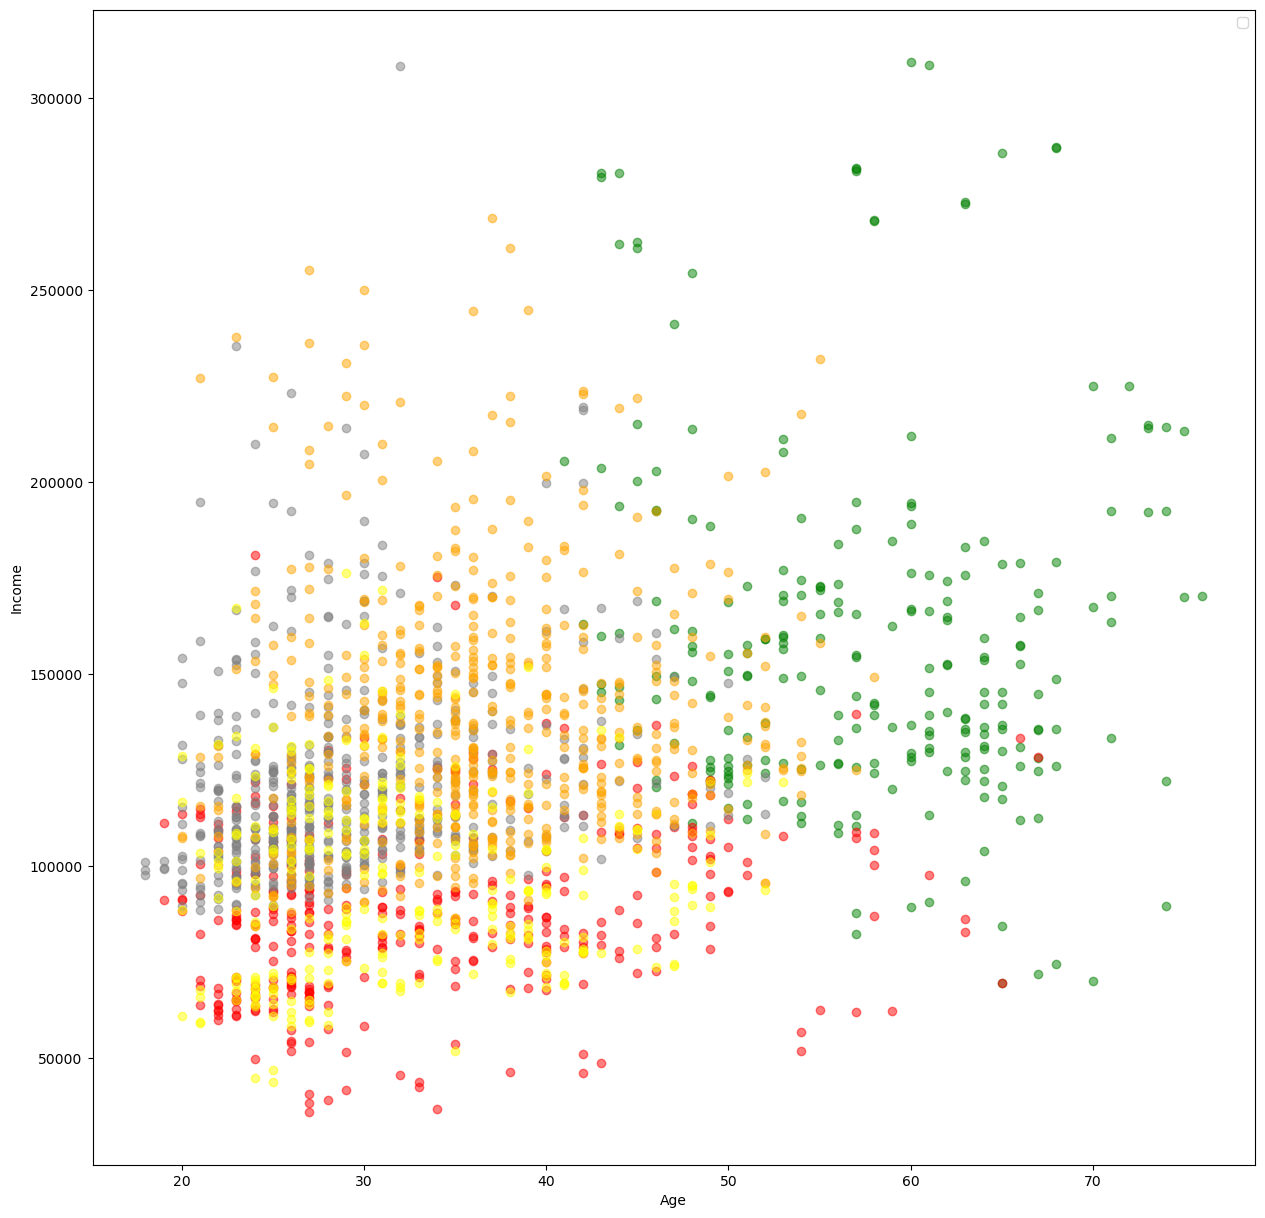

In [26]:
colors = ['green','red','gray','orange','yellow','cyan','magenta','brown','purple','blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10),colors):
    dftemp = df[df.cluster==i]
    plt.scatter(dftemp.Age,dftemp['Income'],color=col, alpha=0.5)

plt.legend()
plt.show()